In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

In [48]:
titanic_data = pd.read_csv('titanic_train.csv')

In [49]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [52]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [53]:
print(titanic_data['Embarked'].mode())

0    S
dtype: object


In [54]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [55]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [56]:
 titanic_data= titanic_data.drop(columns = ['PassengerId','Name','Ticket'],axis=1)


In [57]:
 titanic_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [58]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [59]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

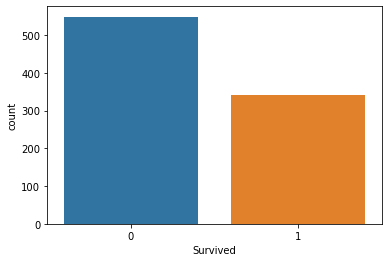

In [60]:
sns.countplot(x='Survived',data=titanic_data)
plt.show()

In [61]:
y= titanic_data['Survived']
x= titanic_data.drop(['Survived'], axis =1)

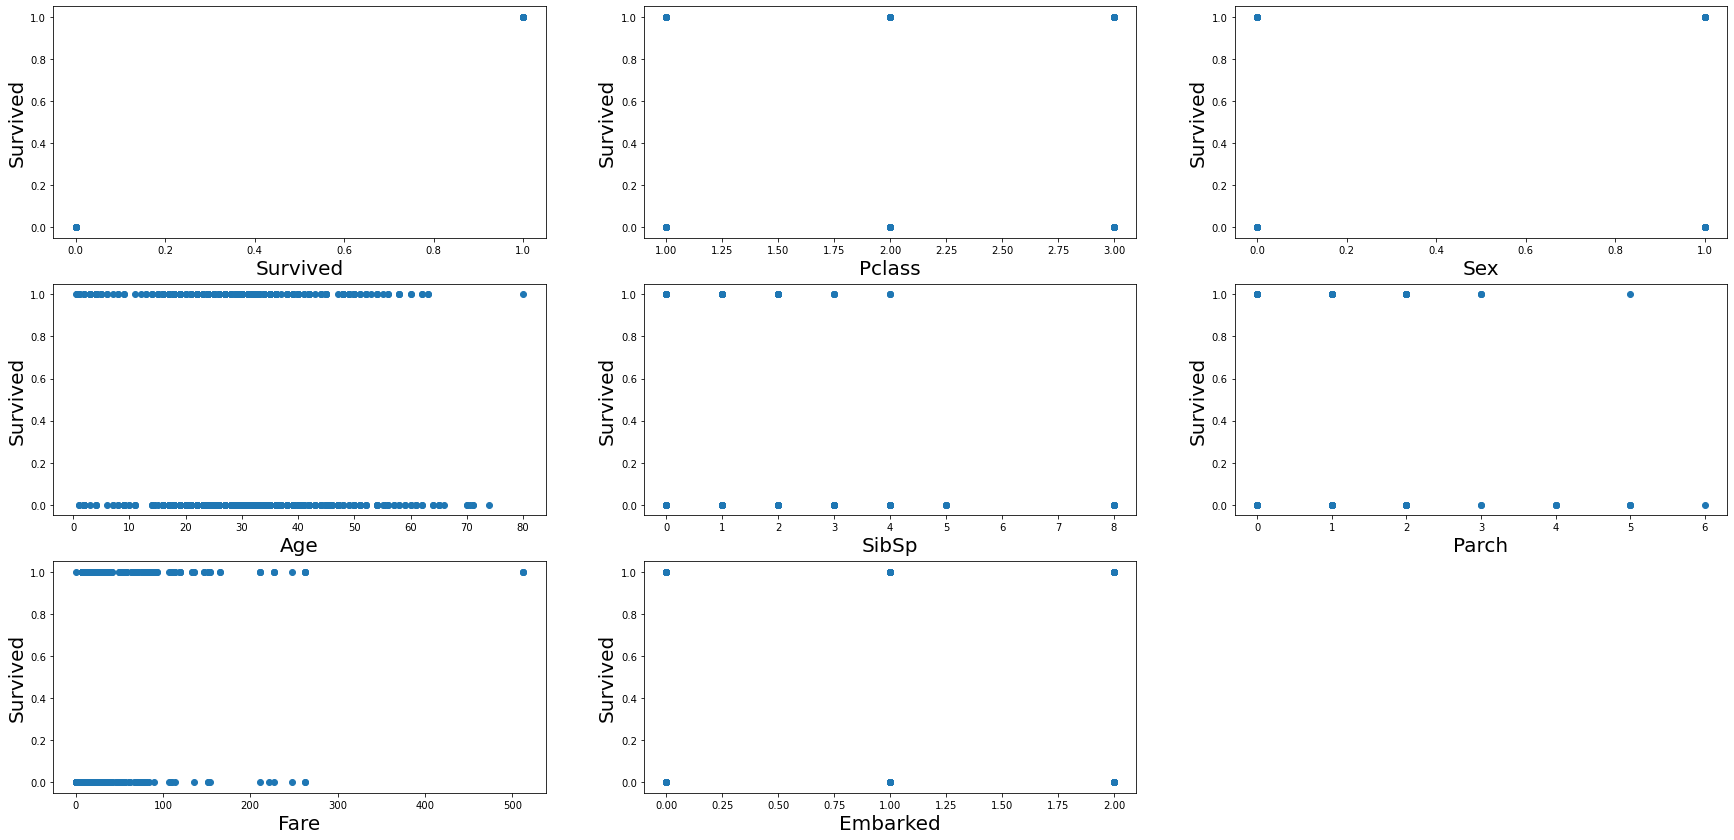

In [62]:
plt.figure(figsize =(30,40),facecolor ='white')
plotnumber = 1
for column in titanic_data:
    if plotnumber<=24:
        ax =plt.subplot(8,3,plotnumber)
        plt.scatter(titanic_data[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Survived',fontsize=20)
    plotnumber +=1
plt.show()

In [63]:
data_corr = titanic_data.corr().abs()
data_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,0.338481,0.543351,0.069809,0.035322,0.081629,0.257307,0.106811
Pclass,0.338481,1.000000,0.131900,0.331339,0.083081,0.018443,0.549500,0.045702
Sex,0.543351,0.131900,1.000000,0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.069809,0.331339,0.084153,1.000000,0.232625,0.179191,0.091566,0.007461
SibSp,0.035322,0.083081,0.114631,0.232625,1.000000,0.414838,0.159651,0.059961
Parch,0.081629,0.018443,0.245489,0.179191,0.414838,1.000000,0.216225,0.078665
Fare,0.257307,0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.007461,0.059961,0.078665,0.062142,1.000000


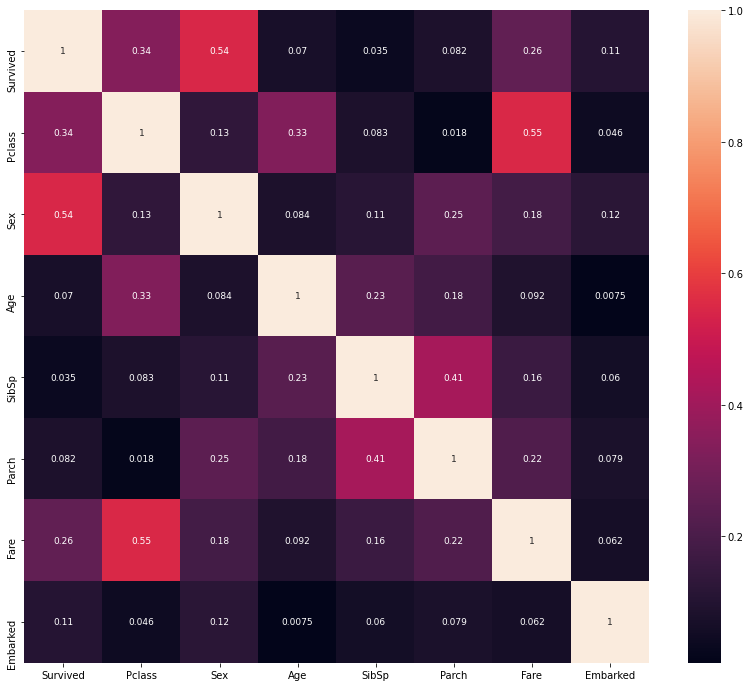

In [64]:
plt.figure(figsize=(14,12))
sns.heatmap(data_corr,annot=True, annot_kws={"size": 9})
plt.show()

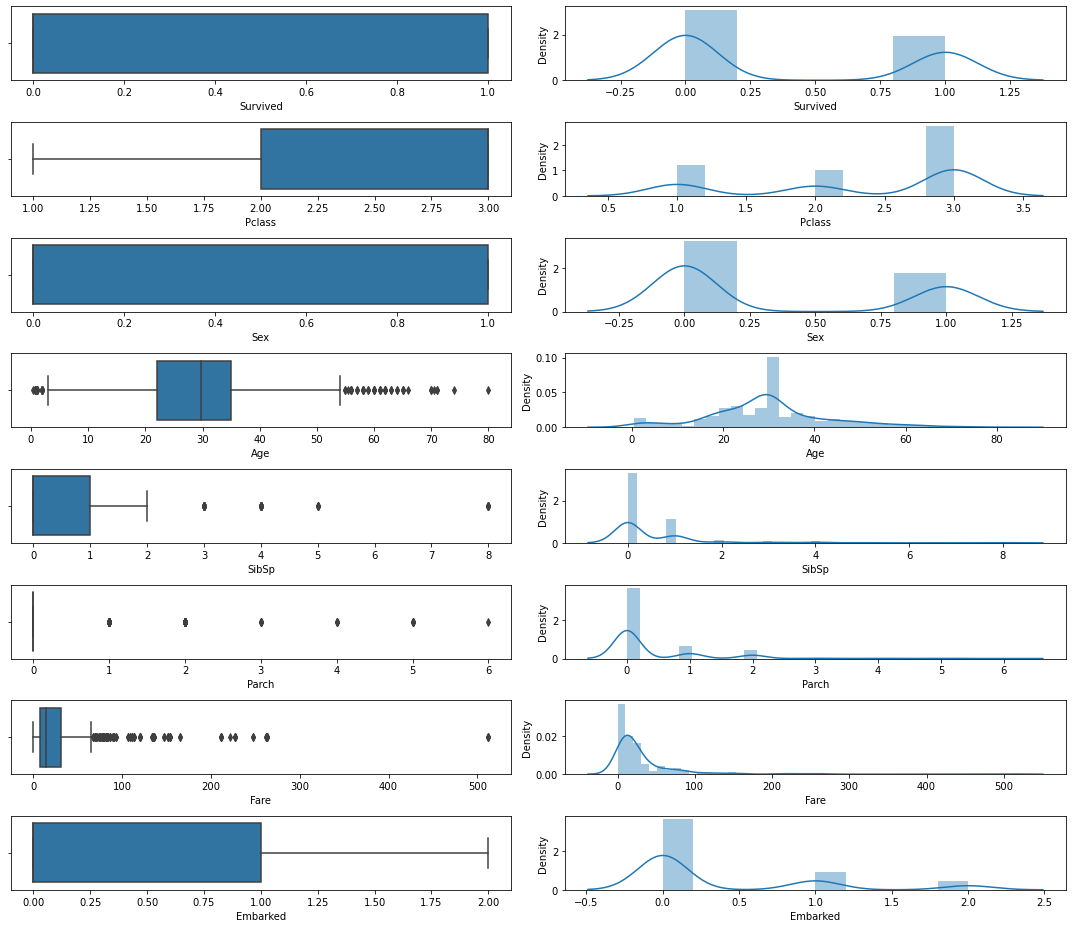

In [65]:
fig, ax = plt.subplots(8, 2, figsize = (15, 13))
sns.boxplot(x= titanic_data["Survived"], ax = ax[0,0])
sns.distplot(titanic_data['Survived'], ax = ax[0,1])
sns.boxplot(x= titanic_data["Pclass"], ax = ax[1,0])
sns.distplot(titanic_data['Pclass'], ax = ax[1,1])
sns.boxplot(x= titanic_data["Sex"], ax = ax[2,0])
sns.distplot(titanic_data['Sex'], ax = ax[2,1])
sns.boxplot(x= titanic_data["Age"], ax = ax[3,0])
sns.distplot(titanic_data['Age'], ax = ax[3,1])
sns.boxplot(x= titanic_data["SibSp"], ax = ax[4,0])
sns.distplot(titanic_data['SibSp'], ax = ax[4,1])
sns.boxplot(x= titanic_data["Parch"], ax = ax[5,0])
sns.distplot(titanic_data['Parch'], ax = ax[5,1])
sns.boxplot(x= titanic_data["Fare"], ax = ax[6,0])
sns.distplot(titanic_data['Fare'], ax = ax[6,1])
sns.boxplot(x= titanic_data["Embarked"], ax = ax[7,0])
sns.distplot(titanic_data['Embarked'], ax = ax[7,1])
plt.tight_layout()

# Distributions of the variables/feature

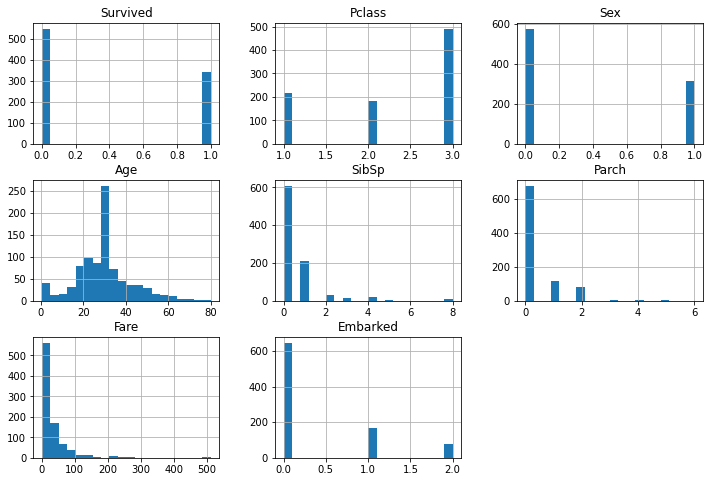

In [66]:
titanic_data.hist(figsize=(12,8),bins=20)
plt.show()

# Checking the Skewness

In [67]:
titanic_data.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

# Using Power Transform to reduce skewness

In [68]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x = pd.DataFrame(x_new,columns=x.columns)

In [69]:
x.skew()

Pclass     -0.441438
Sex         0.618921
Age         0.064420
SibSp       0.808608
Parch       1.228795
Fare       -0.040329
Embarked    1.013716
dtype: float64

# Checking Outliers

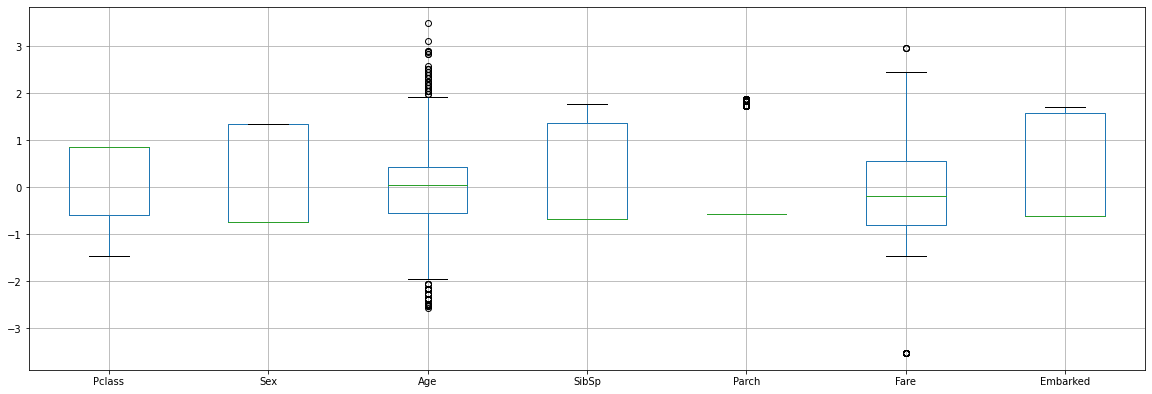

In [70]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAcc = 0
maxRs =0
for i in range(1,300):
    x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.25,random_state=i)
    Lr=LogisticRegression()
    Lr.fit(x_train,y_train)
    predrf = Lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc :
        maxAcc=acc
        maxRs =i
print("Best accuracy is ",maxAcc," on Random_state ",maxRs)

Best accuracy is  0.8699551569506726  on Random_state  150


# Creating Train-test split

In [72]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size= .25,random_state = 150)

# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
predlr = Lr.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  86.99551569506725
[[122  12]
 [ 17  72]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       134
           1       0.86      0.81      0.83        89

    accuracy                           0.87       223
   macro avg       0.87      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223



# Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Accuracy ", accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  84.30493273542601
[[115  19]
 [ 16  73]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       134
           1       0.79      0.82      0.81        89

    accuracy                           0.84       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.84      0.84      0.84       223



# Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  86.99551569506725
[[124  10]
 [ 19  70]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       134
           1       0.88      0.79      0.83        89

    accuracy                           0.87       223
   macro avg       0.87      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223



# SVC

In [76]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuracy  86.99551569506725
[[128   6]
 [ 23  66]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       134
           1       0.92      0.74      0.82        89

    accuracy                           0.87       223
   macro avg       0.88      0.85      0.86       223
weighted avg       0.88      0.87      0.87       223



# Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(Lr,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

Cross validation score of Logistic Regression model : 0.7923859142552256


In [78]:
scr = cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

Cross validation score of Random Forest model : 0.7744837110037034


In [79]:
scr = cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

Cross validation score of Random Forest model : 0.8159500345238844


In [80]:
scr = cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.822666499278137


# Hyper Parameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV

parameters= {'max_features' : ['auto','sqrt','log2'],
             'max_depth' : [4,5,6,7,8,9,10,11,13,14,15],
             'criterion': ['gini','entropy']}

In [82]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt'}

In [83]:
GCV_pred= GCV.best_estimator_.predict(x_test)


# ROC AUC Plot

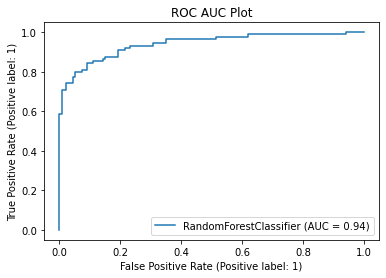

In [84]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# Saving the model

In [85]:
import pickle
filename = 'Titanic_prediction.pkl'
pickle.dump(rf,open(filename, 'wb'))